### forge 데이터셋

In [1]:
!pip install mglearn 

In [2]:
import mglearn

In [3]:
x,y= mglearn.datasets.make_forge()

C:\Users\user\anaconda3\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function make_blobs is deprecated; Please import make_blobs directly from scikit-learn
  warnings.warn(msg, category=FutureWarning)


In [4]:
import matplotlib.pyplot as plt
from matplotlib import rc

In [5]:
plt.rc('font', family='Malgun Gothic')
plt.rcParams['axes.unicode_minus']= False

x.shape (26, 2)


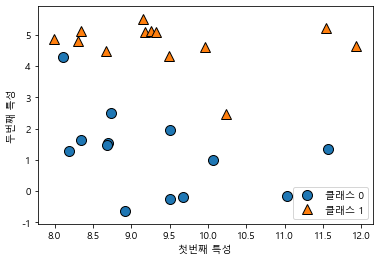

In [6]:
mglearn.discrete_scatter(x[:,0],x[:,1],y)
plt.legend(['클래스 0','클래스 1'], loc= 4)
plt.xlabel('첫번째 특성')
plt.ylabel('두번째 특성')
print('x.shape',x.shape)

### wave 데이터셋

In [7]:
x,y= mglearn.datasets.make_wave(n_samples= 40)

Text(0, 0.5, '타깃')

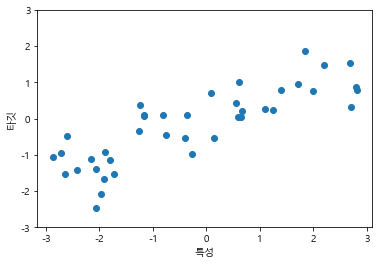

In [8]:
plt.plot(x,y,'o')
plt.ylim(-3,3)
plt.xlabel('특성')
plt.ylabel('타깃')

### 유방암 데이터

In [9]:
from sklearn.datasets import load_breast_cancer

In [10]:
cancer= load_breast_cancer()

In [11]:
print('cancer.keys():', cancer.keys())

cancer.keys(): dict_keys(['data', 'target', 'frame', 'target_names', 'DESCR', 'feature_names', 'filename', 'data_module'])


In [12]:
print('유방암 데이터의 형태:', cancer.data.shape)

유방암 데이터의 형태: (569, 30)


In [13]:
import numpy as np

In [14]:
print('클래스별 샘플 개수:', 
      {n: v for n, v in zip(cancer.target_names, np.bincount(cancer.target))})

클래스별 샘플 개수: {'malignant': 212, 'benign': 357}


In [15]:
print('특성이름:', cancer.feature_names)

특성이름: ['mean radius' 'mean texture' 'mean perimeter' 'mean area'
 'mean smoothness' 'mean compactness' 'mean concavity'
 'mean concave points' 'mean symmetry' 'mean fractal dimension'
 'radius error' 'texture error' 'perimeter error' 'area error'
 'smoothness error' 'compactness error' 'concavity error'
 'concave points error' 'symmetry error' 'fractal dimension error'
 'worst radius' 'worst texture' 'worst perimeter' 'worst area'
 'worst smoothness' 'worst compactness' 'worst concavity'
 'worst concave points' 'worst symmetry' 'worst fractal dimension']


### 보스턴 주택

In [16]:
from sklearn.datasets import load_boston

In [17]:
boston= load_boston()

C:\Users\user\anaconda3\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function load_boston is deprecated; `load_boston` is deprecated in 1.0 and will be removed in 1.2.

    The Boston housing prices dataset has an ethical problem. You can refer to
    the documentation of this function for further details.

    The scikit-learn maintainers therefore strongly discourage the use of this
    dataset unless the purpose of the code is to study and educate about
    ethical issues in data science and machine learning.

    In this special case, you can fetch the dataset from the original
    source::

        import pandas as pd
        import numpy as np


        data_url = "http://lib.stat.cmu.edu/datasets/boston"
        raw_df = pd.read_csv(data_url, sep="\s+", skiprows=22, header=None)
        data = np.hstack([raw_df.values[::2, :], raw_df.values[1::2, :2]])
        target = raw_df.values[1::2, 2]

    Alternative datasets include the California housing dataset (i

In [18]:
print('유방암 데이터의 형태:', boston.data.shape)

유방암 데이터의 형태: (506, 13)


In [19]:
print('특성이름:', boston.feature_names)

특성이름: ['CRIM' 'ZN' 'INDUS' 'CHAS' 'NOX' 'RM' 'AGE' 'DIS' 'RAD' 'TAX' 'PTRATIO'
 'B' 'LSTAT']


In [20]:
x,y= mglearn.datasets.load_extended_boston()
print('x.shape', x.shape)

x.shape (506, 104)


### 분류 모델

In [21]:
from sklearn.model_selection import train_test_split
from sklearn import metrics

In [22]:
x,y= mglearn.datasets.make_forge()

C:\Users\user\anaconda3\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function make_blobs is deprecated; Please import make_blobs directly from scikit-learn
  warnings.warn(msg, category=FutureWarning)


In [23]:
x_train, x_test, y_train, y_test= train_test_split(x, y, random_state= 0)

In [24]:
from sklearn.neighbors import KNeighborsClassifier

In [25]:
clf= KNeighborsClassifier(n_neighbors= 3)

In [26]:
clf.fit(x_train, y_train)

KNeighborsClassifier(n_neighbors=3)

In [27]:
pred= clf.predict(x_test)

In [28]:
print(pred)

[1 0 1 0 1 0 0]


In [29]:
clf.score(x_test, y_test)

0.8571428571428571

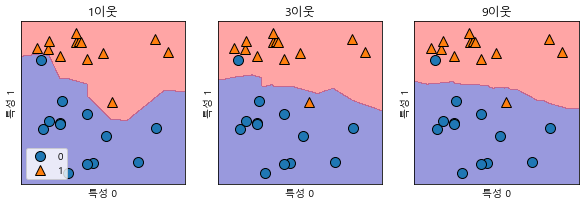

In [30]:
gif, axes= plt.subplots(1, 3, figsize= (10, 3))

for n_neighbors, ax in zip([1,3,9], axes):
    
    clf= KNeighborsClassifier(n_neighbors).fit(x, y)
    mglearn.plots.plot_2d_separator(clf, x, fill= True, eps= 0.5, ax=ax, alpha= .4)
    mglearn.discrete_scatter(x[:, 0], x[:, 1], y, ax=ax)
    ax.set_title('{}이웃'.format(n_neighbors))
    ax.set_xlabel('특성 0')
    ax.set_ylabel('특성 1')
    
axes[0].legend(loc= 3)

In [31]:
from sklearn.datasets import load_breast_cancer

In [32]:
cacer= load_breast_cancer

In [33]:
x_train, x_test, y_train, y_test= train_test_split(cancer.data, 
                                                   cancer.target,
                                                   stratify= cancer.target,
                                                   random_state= 0)

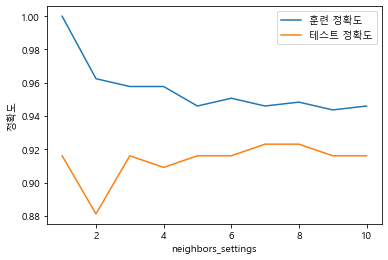

In [34]:
training_accuracy= []
test_accuracy= []

neighbors_settings= range(1,11)

for n_neighbors in neighbors_settings:
    
    clf= KNeighborsClassifier(n_neighbors= n_neighbors)
    clf.fit(x_train, y_train)
    training_accuracy.append(clf.score(x_train, y_train))
    test_accuracy.append(clf.score(x_test, y_test)) 

plt.plot(neighbors_settings, training_accuracy, label= '훈련 정확도')
plt.plot(neighbors_settings, test_accuracy, label= '테스트 정확도')
plt.ylabel('정확도')
plt.xlabel('neighbors_settings')
plt.legend()
plt.show()

In [35]:
from sklearn.neighbors import KNeighborsRegressor

In [36]:
x,y= mglearn.datasets.make_wave(n_samples= 40)
x_train, x_test, y_train, y_test= train_test_split(x, y, random_state= 0)

In [37]:
reg= KNeighborsRegressor(n_neighbors= 3)

In [38]:
reg.fit(x_train, y_train)

KNeighborsRegressor(n_neighbors=3)

In [39]:
pred= reg.predict(x_test)

In [40]:
reg.score(x_test, y_test)

0.8344172446249605

## 아이리스 데이터셋

### 문제정의

In [41]:
import pandas as pd
import numpy as np

### 데이터 수집

In [42]:
from sklearn import datasets

In [43]:
iris= datasets.load_iris()

### 데이터 전처리-스킵

### 탐색적 분석

In [44]:
iris.keys()

dict_keys(['data', 'target', 'frame', 'target_names', 'DESCR', 'feature_names', 'filename', 'data_module'])

In [45]:
iris['DESCR']

'.. _iris_dataset:\n\nIris plants dataset\n--------------------\n\n**Data Set Characteristics:**\n\n    :Number of Instances: 150 (50 in each of three classes)\n    :Number of Attributes: 4 numeric, predictive attributes and the class\n    :Attribute Information:\n        - sepal length in cm\n        - sepal width in cm\n        - petal length in cm\n        - petal width in cm\n        - class:\n                - Iris-Setosa\n                - Iris-Versicolour\n                - Iris-Virginica\n                \n    :Summary Statistics:\n\n    ============== ==== ==== ======= ===== ====================\n                    Min  Max   Mean    SD   Class Correlation\n    ============== ==== ==== ======= ===== ====================\n    sepal length:   4.3  7.9   5.84   0.83    0.7826\n    sepal width:    2.0  4.4   3.05   0.43   -0.4194\n    petal length:   1.0  6.9   3.76   1.76    0.9490  (high!)\n    petal width:    0.1  2.5   1.20   0.76    0.9565  (high!)\n    ============== ==== =

In [46]:
iris['data'].shape

(150, 4)

In [47]:
iris['target'].shape

(150,)

### 데이터프레임 변환

In [48]:
df= pd.DataFrame(iris['data'], columns= iris['feature_names'])

In [49]:
df.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2


In [50]:
df.columns= ['sepal_length', 'sepal_width', 'petal_length', 'petal_width']
df.head()

,sepal_length,sepal_width,petal_length,petal_width
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2


In [51]:
df['target']= iris['target']
df.head()

,sepal_length,sepal_width,petal_length,petal_width,target
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0


In [52]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   sepal_length  150 non-null    float64
 1   sepal_width   150 non-null    float64
 2   petal_length  150 non-null    float64
 3   petal_width   150 non-null    float64
 4   target        150 non-null    int32  
dtypes: float64(4), int32(1)
memory usage: 5.4 KB


In [53]:
df.describe()

,sepal_length,sepal_width,petal_length,petal_width,target
count,150.000000,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.057333,3.758000,1.199333,1.000000
std,0.828066,0.435866,1.765298,0.762238,0.819232
min,4.300000,2.000000,1.000000,0.100000,0.000000
25%,5.100000,2.800000,1.600000,0.300000,0.000000
50%,5.800000,3.000000,4.350000,1.300000,1.000000
75%,6.400000,3.300000,5.100000,1.800000,2.000000
max,7.900000,4.400000,6.900000,2.500000,2.000000


In [54]:
df.isnull().sum() #비어 있는 값 찾기

sepal_length    0
sepal_width     0
petal_length    0
petal_width     0
target          0
dtype: int64

In [55]:
df.duplicated().sum() #중복값 찾기

1

In [56]:
df.drop_duplicates(inplace= True) 
#중복값 삭제 (inplace= True을 지정해주면 영구적으로 삭제)

In [57]:
df

,sepal_length,sepal_width,petal_length,petal_width,target
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,2
146,6.3,2.5,5.0,1.9,2
147,6.5,3.0,5.2,2.0,2
148,6.2,3.4,5.4,2.3,2


In [58]:
df.corr() #상관계수

,sepal_length,sepal_width,petal_length,petal_width,target
sepal_length,1.000000,-0.118129,0.873738,0.820620,0.786971
sepal_width,-0.118129,1.000000,-0.426028,-0.362894,-0.422987
petal_length,0.873738,-0.426028,1.000000,0.962772,0.949402
petal_width,0.820620,-0.362894,0.962772,1.000000,0.956514
target,0.786971,-0.422987,0.949402,0.956514,1.000000


### 데이터 시각화

In [59]:
import seaborn as sns
sns.set(font_scale= 1.2)

<AxesSubplot:>

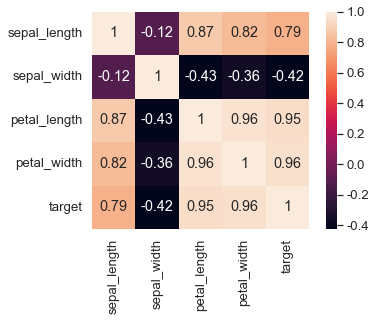

In [60]:
sns.heatmap(data=df.corr(), square= True, annot= True, cbar= True)
#annot= True 상관계수 보기

In [61]:
df['target'].value_counts() #위에서 중복값 삭제로 인해 

0    50
1    50
2    49
Name: target, dtype: int64

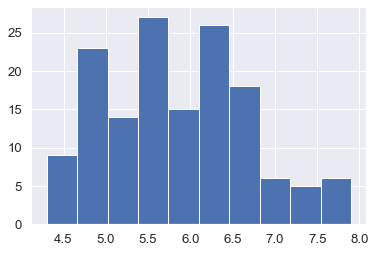

In [62]:
plt.hist(x= 'sepal_length', data= df)
plt.show()

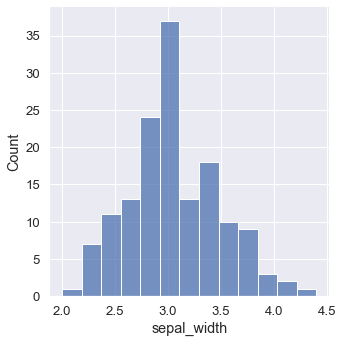

In [63]:
sns.displot(x= 'sepal_width', kind= 'hist', data= df)

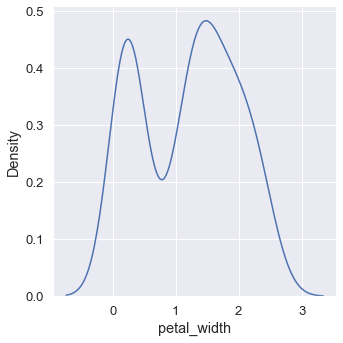

In [64]:
sns.displot(x= 'petal_width', kind= 'kde', data= df)

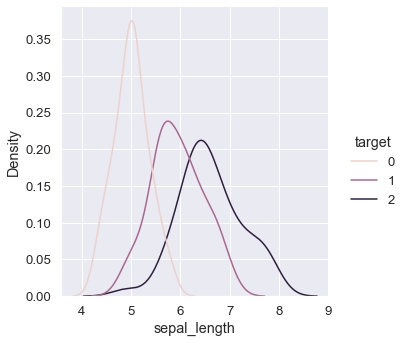

In [65]:
sns.displot(x= 'sepal_length', hue= 'target', kind= 'kde', data= df)

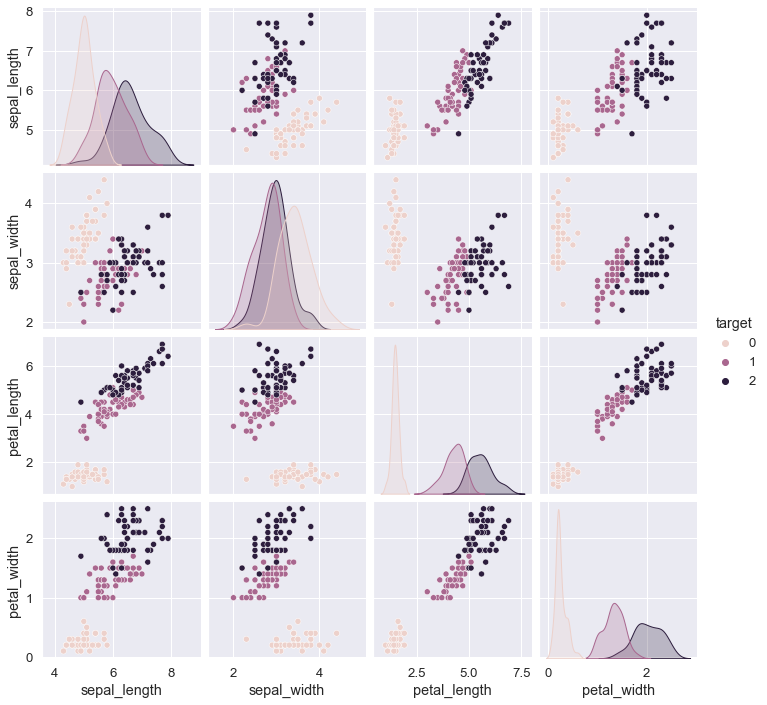

In [66]:
sns.pairplot(df, hue= 'target', height= 2.5, diag_kind= 'kde')
plt.show()

### 데이터셋 분할

In [67]:
from sklearn.model_selection import train_test_split

In [68]:
x= df.loc[:, 'sepal_length':'petal_width']
y= df.loc[:, 'target']

In [69]:
x_train, x_test, y_train, y_test= train_test_split(x, y, test_size= 0.3,
                                                   shuffle= True,
                                                   random_state=20)
print(x_train.shape, y_train.shape)
print(x_test.shape, y_test.shape)

(104, 4) (104,)
(45, 4) (45,)


In [70]:
#test_size= 0.3 테스트 비율을 0.75 : 0.25에서 0.7 : 0.3
#shuffle= True 무작위 추출
#random_state=20 20번째 램덤값으로 고정

In [71]:
from sklearn.neighbors import KNeighborsClassifier

In [72]:
clf= KNeighborsClassifier(n_neighbors= 5) #모델 정의

In [73]:
clf.fit(x_train, y_train) #모델 학습

KNeighborsClassifier()

In [74]:
pred= clf.predict(x_test) #모델 예측

In [75]:
clf.score(x_test, y_test) #모델 평가

0.9555555555555556

In [76]:
from sklearn.metrics import accuracy_score

In [77]:
acc= accuracy_score(y_test, pred)
print('Accuracy : %4f'%acc)

Accuracy : 0.955556


## Fish 데이터셋

###  1. 문제 정의

In [78]:
fish= pd.read_csv('Fish.csv')

In [79]:
fish

,Species,Weight,Length1,Length2,Length3,Height,Width
0,Bream,242.0,23.2,25.4,30.0,11.5200,4.0200
1,Bream,290.0,24.0,26.3,31.2,12.4800,4.3056
2,Bream,340.0,23.9,26.5,31.1,12.3778,4.6961
3,Bream,363.0,26.3,29.0,33.5,12.7300,4.4555
4,Bream,430.0,26.5,29.0,34.0,12.4440,5.1340
...,...,...,...,...,...,...,...
154,Smelt,12.2,11.5,12.2,13.4,2.0904,1.3936
155,Smelt,13.4,11.7,12.4,13.5,2.4300,1.2690
156,Smelt,12.2,12.1,13.0,13.8,2.2770,1.2558
157,Smelt,19.7,13.2,14.3,15.2,2.8728,2.0672


### 2. 데이터 수집

In [80]:
fish.head()

,Species,Weight,Length1,Length2,Length3,Height,Width
0,Bream,242.0,23.2,25.4,30.0,11.5200,4.0200
1,Bream,290.0,24.0,26.3,31.2,12.4800,4.3056
2,Bream,340.0,23.9,26.5,31.1,12.3778,4.6961
3,Bream,363.0,26.3,29.0,33.5,12.7300,4.4555
4,Bream,430.0,26.5,29.0,34.0,12.4440,5.1340


### 3. 데이터 전처리 - 스킵

### 4. 탐색적 분석

In [81]:
fish.shape

(159, 7)

In [82]:
fish.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 159 entries, 0 to 158
Data columns (total 7 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   Species  159 non-null    object 
 1   Weight   159 non-null    float64
 2   Length1  159 non-null    float64
 3   Length2  159 non-null    float64
 4   Length3  159 non-null    float64
 5   Height   159 non-null    float64
 6   Width    159 non-null    float64
dtypes: float64(6), object(1)
memory usage: 8.8+ KB


In [83]:
fish.describe()

,Weight,Length1,Length2,Length3,Height,Width
count,159.000000,159.000000,159.000000,159.000000,159.000000,159.000000
mean,398.326415,26.247170,28.415723,31.227044,8.970994,4.417486
std,357.978317,9.996441,10.716328,11.610246,4.286208,1.685804
min,0.000000,7.500000,8.400000,8.800000,1.728400,1.047600
25%,120.000000,19.050000,21.000000,23.150000,5.944800,3.385650
50%,273.000000,25.200000,27.300000,29.400000,7.786000,4.248500
75%,650.000000,32.700000,35.500000,39.650000,12.365900,5.584500
max,1650.000000,59.000000,63.400000,68.000000,18.957000,8.142000


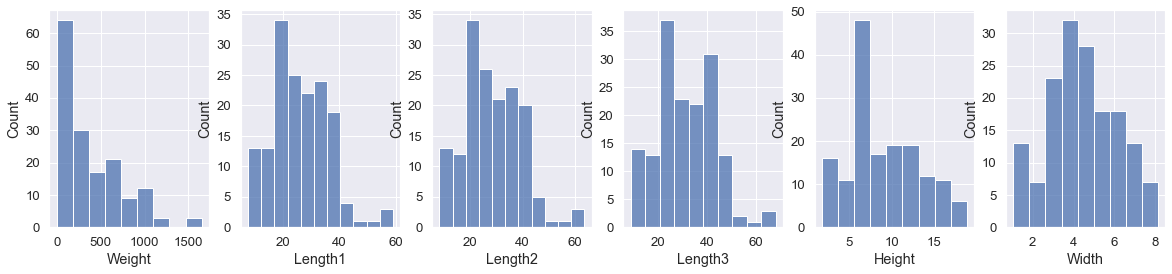

In [84]:
fig, ax= plt.subplots(ncols=6, figsize= (20,4))
variables= fish.columns[1:]
for i, var in enumerate(variables):
    sns.histplot(data= fish, x= var, ax=ax[i])
plt.show()

In [85]:
fish['Species'].value_counts()

Perch        56
Bream        35
Roach        20
Pike         17
Smelt        14
Parkki       11
Whitefish     6
Name: Species, dtype: int64

In [86]:
bream= fish[fish['Species']=='Bream']
num_bream= len(bream)
print(num_bream)

35


In [87]:
bream_weight= bream['Weight'].values
bream_length= bream['Length2'].values
bream_length

array([25.4, 26.3, 26.5, 29. , 29. , 29.7, 29.7, 30. , 30. , 30.7, 31. ,
       31. , 31.5, 32. , 32. , 32. , 33. , 33. , 33.5, 33.5, 34. , 34. ,
       34.5, 35. , 35. , 35. , 35. , 36. , 36. , 37. , 38.5, 38.5, 39.5,
       41. , 41. ])

In [88]:
smelt= fish[fish['Species']=='Smelt']
num_smelt= len(smelt)
print(num_smelt)

14


In [89]:
smelt_weight= smelt['Weight']
smelt_length= smelt['Length2']
smelt_length

145     9.8
146    10.5
147    10.6
148    11.0
149    11.2
150    11.3
151    11.8
152    11.8
153    12.0
154    12.2
155    12.4
156    13.0
157    14.3
158    15.0
Name: Length2, dtype: float64

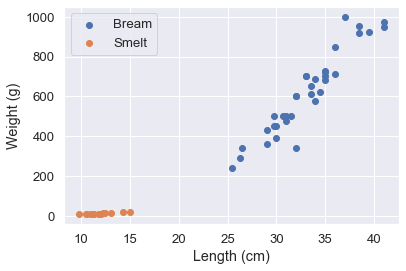

In [90]:
plt.scatter(bream_length, bream_weight,  label= 'Bream')
plt.scatter( smelt_length, smelt_weight, label= 'Smelt')

plt.legend()
plt.xlabel('Length (cm)')
plt.ylabel('Weight (g)')
plt.show()

In [91]:
bream_data= np.c_[bream_weight, bream_length]
len(bream_data)

35

In [92]:
smelt_data= np.c_[smelt_weight, smelt_length]
len(smelt_data)

14

In [93]:
fish_label= np.array([1]* num_bream+ [0]* num_smelt)
fish_label

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0])

In [94]:
fish_data= np.r_[bream_data, smelt_data]
len(fish_data)

49

### 5. 모델 정의

In [95]:
x_train, x_test, y_train, y_test= train_test_split(fish_data, fish_label, 
                                                   test_size= 0.2,
                                                   shuffle= True,
                                                   random_state= 0)
print(x_train.shape, y_train.shape)
print(x_test.shape, y_test.shape)

(39, 2) (39,)
(10, 2) (10,)


In [96]:
fish= KNeighborsClassifier(n_neighbors= 1)

### 6. 모델 학습

In [97]:
fish.fit(x_train, y_train)

KNeighborsClassifier(n_neighbors=1)

### 7. 모델 예측 및 평가

In [98]:
pred= fish.predict(x_test)

In [99]:
fish.score(x_test, y_test)

1.0